# Gradient Descent

We start with a cost function $J(\beta)$ then gradually move towards the minimum, i.e. find the $\beta$ values at which this cost function is minimized.

- We initialize at some random point on our cost function and we use our gradient to gradually descent towards that minimum value

<div>
    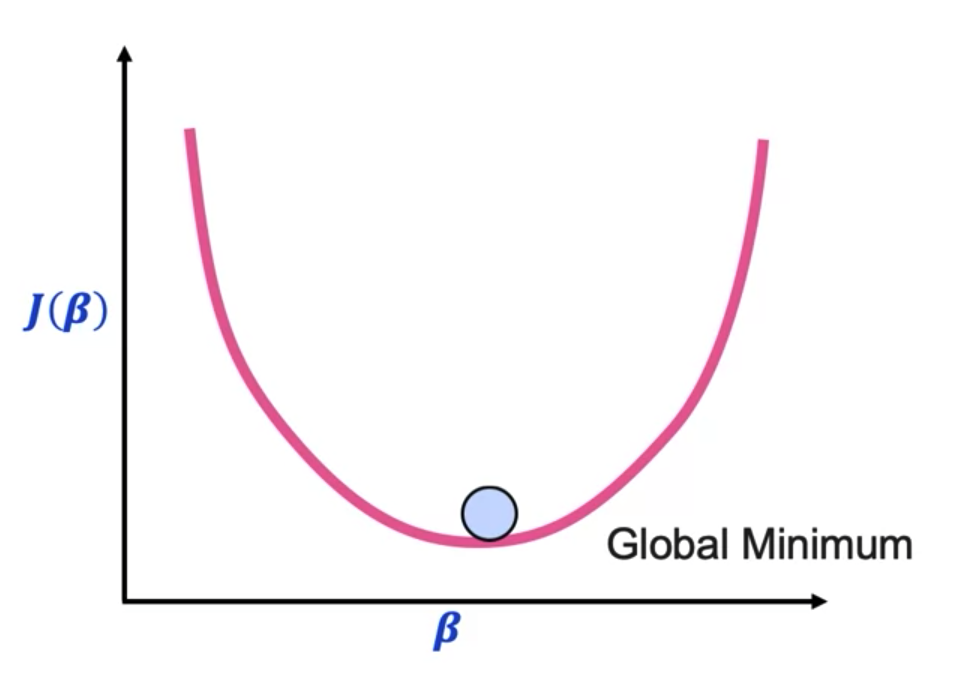
<div/>

## Linear Regression

We use the gradient and the cost function to calculate the next point in our descent ($\omega_1$) from the current one ($\omega_0$)

$$\omega_1 = \omega_0 - \alpha \nabla \frac{1}{2} \sum_{i=1}^{m} \Big( \Big( \beta_0 + \beta_1 x_{\text{obs}}^{(i)} \Big) - y_{\text{obs}}^{(i)} \Big) $$

<div>
    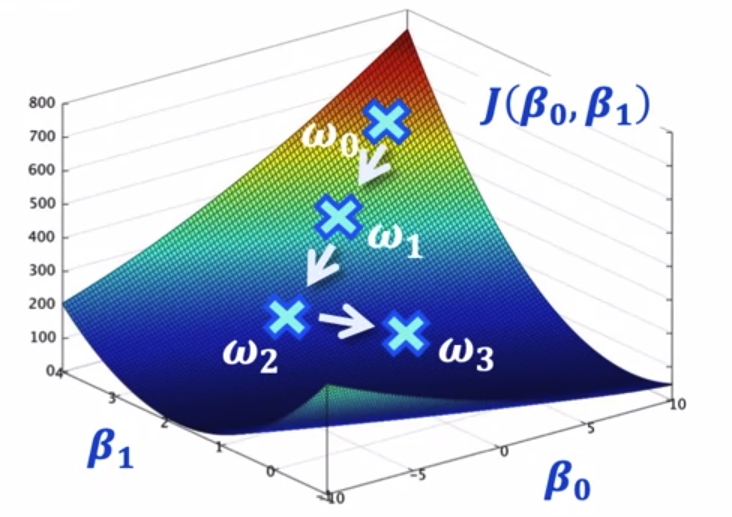
<div/>

The learning rate ($\alpha$) is a tunable parameter that determines step size (how large we want to make each one of our steps within our cost function)

- Too large of a step - overshooting the minimum


- Too small of a step - Take too long to optimize

# Stochastic Gradient Descent

Uses a single data point to determine the gradient and cost function instead of using all the data.

Therefore instead of taking the sum of the squared distances, we calculate our weights by subtracting from the previous step, the gradient given the error for just one value.

$$\omega_1 = \omega_0 - \alpha \nabla \frac{1}{2}  \Big( \Big( \beta_0 + \beta_1 x_{\text{obs}}^{(i)} \Big) - y_{\text{obs}}^{(i)} \Big) $$

This path is going to be much less direct due to the noise of working with just a single data point

- Steps may be *less-informed* but we take more of them


- should balance out, helps in regularization

## Mini-Batch Gradient Descent

Get the derivative for a *small* set of points, or a sub-sample, then take a step in that direction

- Typical size 16, 32 (larger is slower)


- balance between the last two approaches

## Comparison

<div>
    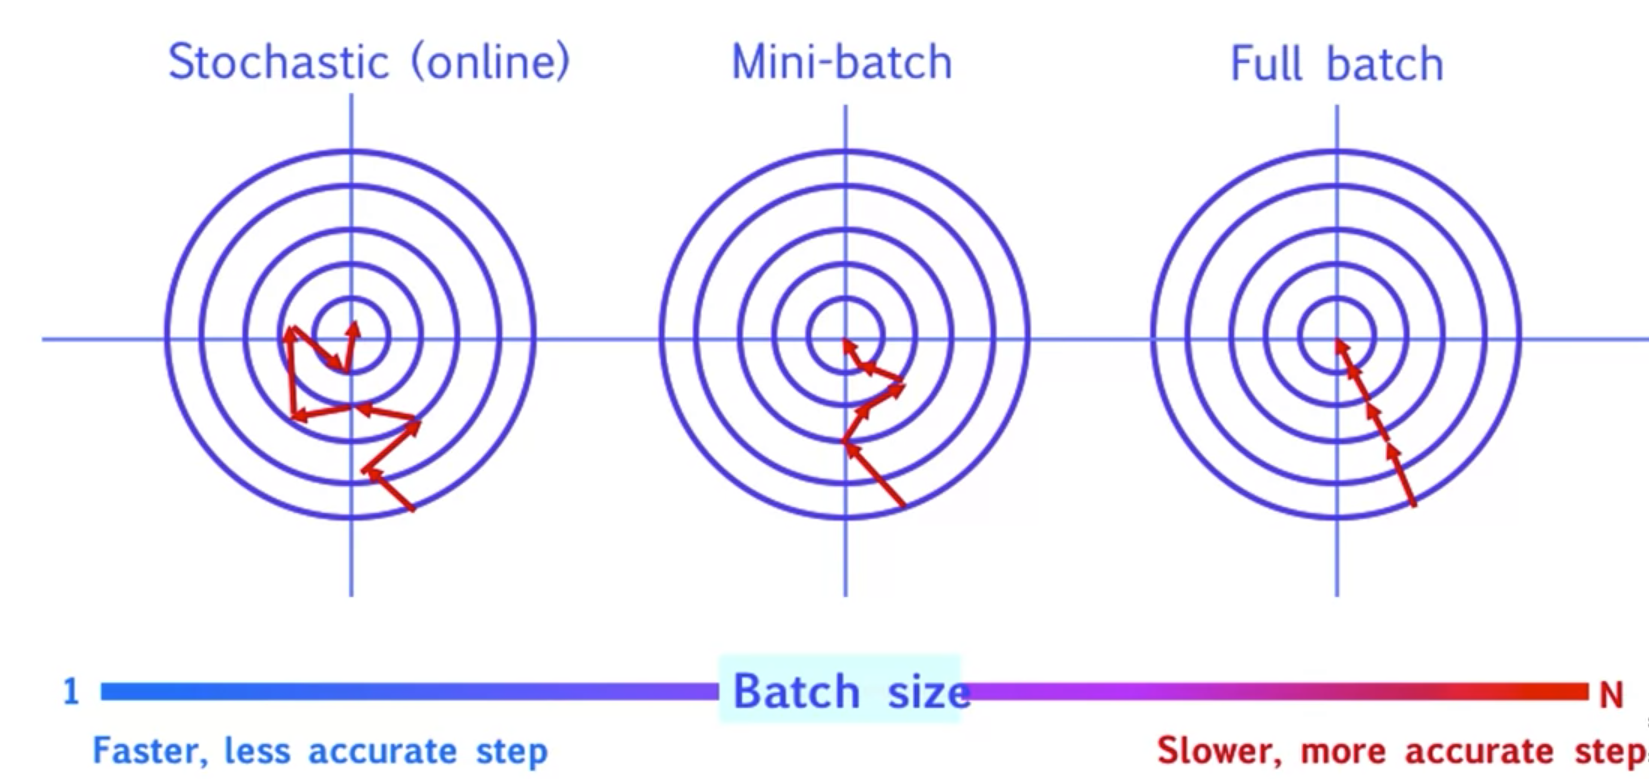
<div/>

- **Full-Batch:** Use entire data set to compute gradient before updating


- **Mini-batch:** use a smaller portion of the data (but more than a single example) to compute the gradient before updating


- **SGB:** Use a single example to compute gradient descent before updating


- **Epoch:** refers to a single pass through of all of the training data (loop through entire dataset)
    - Full batch - there would be 1 step per epoch
    - SGD - n steps taken per epoch (n=trainig ste size)
    - Minibatch - (n/batch size) steps per epoch

## Data Shuffling

Is used to avoid any cyclical movement and aid in convergence - it is recommended to shuffle the data after each epoch.

We shuffle around our data so that at each step we are looking at a different sub-set of data so we do not keep repeating the same path

<div>
    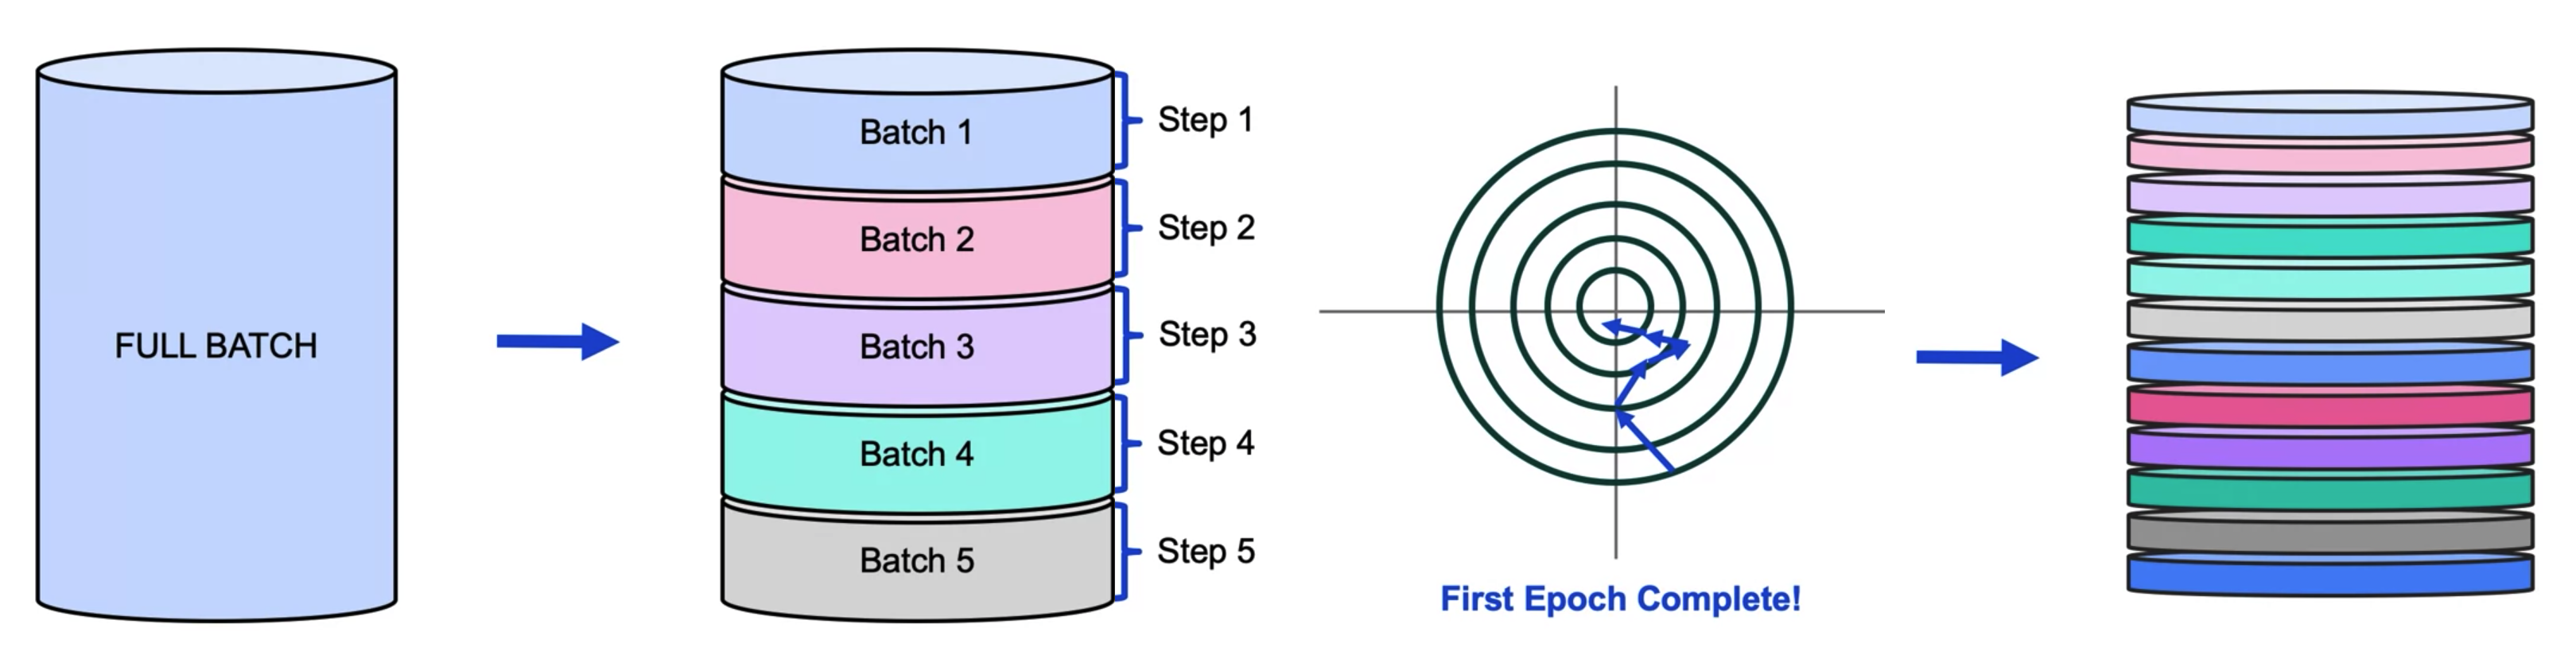
<div/>

## Overview
In this notebook, we will solve a simple linear regression problem by gradient descent.  
We will see the effect of the learning rate on the trajectory in parameter space.
We will show how Stochastic Gradient Descent (SGD) differs from the standard version, and the effect of "shuffling" your data during SGD.

In [1]:
# Preliminaries - packages to load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Data from a known distribution
Below we will generate data a known distribution.  
Specifically, the true model is:

$Y = b + \theta_1 X_1 + \theta_2 X_2 + \epsilon$

$X_1$ and $X_2$ have a uniform distribution on the interval $[0,10]$, while `const` is a vector of ones (representing the intercept term).

We set actual values for $b$ ,$\theta_1$, and $\theta_2$

Here $b=1.5$, $\theta_1=2$, and $\theta_2=5$

We then generate a vector of $y$-values according to the model and put the predictors together in a "feature matrix" `x_mat`

In [2]:
np.random.seed(1234)  ## This ensures we get the same data if all of the other parameters remain fixed

num_obs = 100
x1 = np.random.uniform(0,10,num_obs)
x2 = np.random.uniform(0,10,num_obs)
const = np.ones(num_obs)
eps = np.random.normal(0,.5,num_obs)

b = 1.5
theta_1 = 2
theta_2 = 5

y = b*const+ theta_1*x1 + theta_2*x2 + eps

x_mat = np.array([const,x1,x2]).T

## Get the "Right" answer directly
In the below cells we solve for the optimal set of coefficients.  Note that even though the true model is given by:

$b=1.5$, $\theta_1=2$, and $\theta_2=5$

The maximum likelihood (least-squares) estimate from a finite data set may be slightly different.

## Exercise:
Solve the problem two ways: 
1. By using the scikit-learn LinearRegression model
2. Using matrix algebra directly via the formula $\theta = (X^T X)^{-1}X^Ty$

Note: The scikit-learn solver may give a warning message, this can be ignored.

In [3]:
### Solve directly using sklearn
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(x_mat, y)

lr_model.coef_

array([1.49004618, 1.99675416, 5.01156315])

In [4]:
## Solve by matrix calculation
np.linalg.inv(np.dot(x_mat.T,x_mat)).dot(x_mat.T).dot(y)

array([1.49004618, 1.99675416, 5.01156315])

## Solving by Gradient Descent


For most numerical problems, we don't / can't know the underlying analytical solution. This is because we only arrive at analytical solutions by solving the equations mathematically, with pen and paper. That is more often than not just impossible. Fortunately, we have a way of converging to an approximate solution, by using **Gradient Descent**.


We will explore this very useful method because Neural Networks, along with many other complicated algorithms, are trained using Gradient Descent.  Seeing how gradient descent works on a simple example will build intuition and help us understand some of the nuances around setting the learning rate and other parameters.  We will also explore Stochastic Gradient Descent and compare its behavior to the standard approach.

## Exercise

The next several cells have code to perform (full-batch) gradient descent.  We have omitted some parameters for you to fill in.

1. Pick a learning rate, and a number of iterations, run the code, and then plot the trajectory of your gradient descent.


2. Find examples where the learning rate is too high, too low, and "just right".


3. Look at plots of loss function under these conditions.



In [5]:
## Parameters to play with 
learning_rate = 1e-3
num_iter = 10000
theta_initial = np.array([3,3,3])

In [8]:
def gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial # set initial theta
    theta_path = np.zeros((num_iter+1,3)) # set the path initially as a bunch of zeroes in the shape of num iter+1
    theta_path[0,:]= theta_initial # first value of paths equal to the initial theta

    loss_vec = np.zeros(num_iter)

    ## Main Gradient Descent loop (for a fixed number of iterations)
    for i in range(num_iter):
        y_pred = np.dot(theta.T,x_mat.T)
        loss_vec[i] = np.sum((y-y_pred)**2)
        grad_vec = (y-y_pred).dot(x_mat)/num_obs  #sum up the gradients across all observations and divide by num_obs
        grad_vec = grad_vec
        theta = theta + learning_rate*grad_vec
        theta_path[i+1,:]=theta # next path
    return theta_path, loss_vec

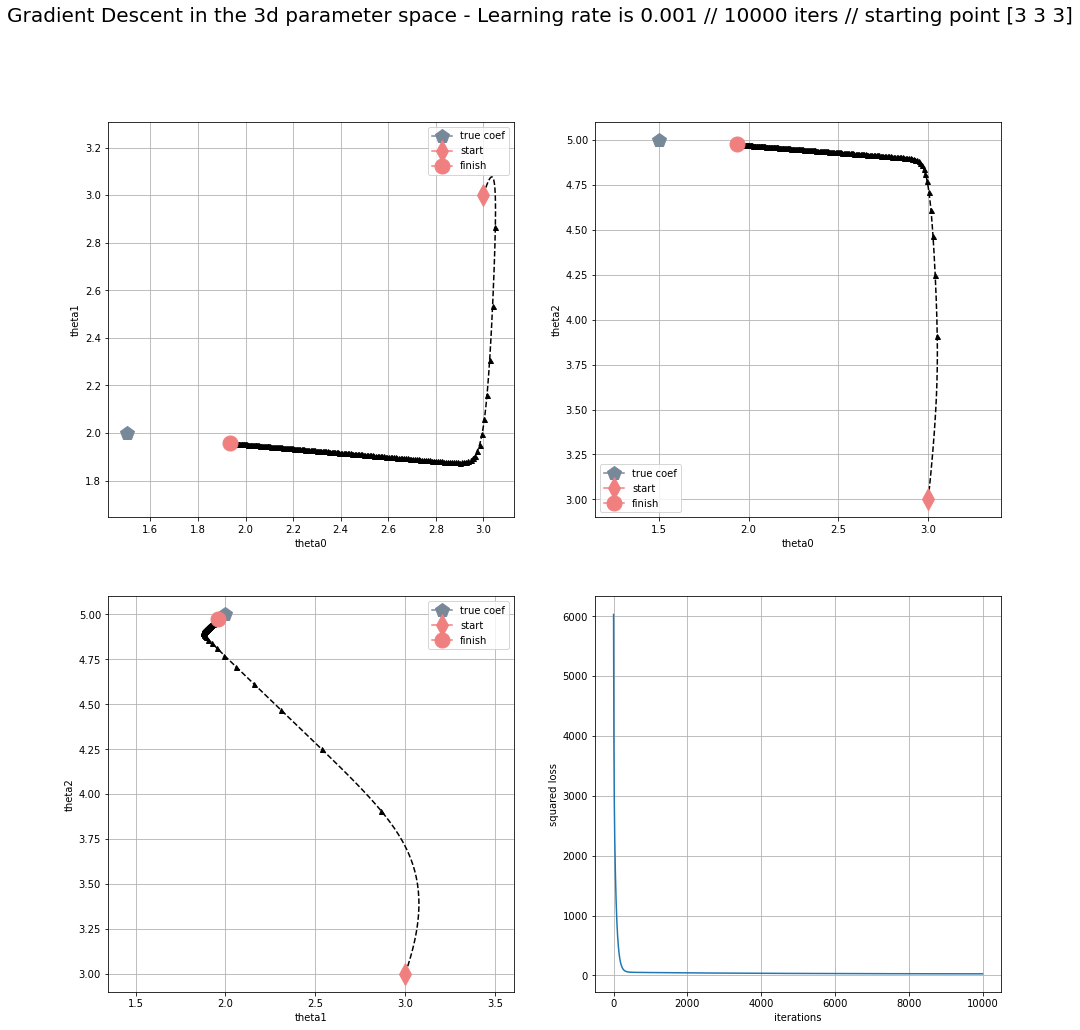

In [9]:
true_coef = [b, theta_1, theta_2]

def plot_ij(theta_path, i, j, ax):
    # plot true coeff
    ax.plot(true_coef[i], true_coef[j],
            marker='p', markersize=15, label='true coef', 
            color='#778899')
    # plot theta path
    ax.plot(theta_path[:, i],theta_path[:, j],
            color='k', linestyle='--', marker='^', 
            markersize=5, markevery=50)
    # starting theta path
    ax.plot(theta_path[0, i], theta_path[0, j], marker='d', 
            markersize=15, label='start', color='#F08080')
    # ending theta path
    ax.plot(theta_path[-1, i], theta_path[-1, j], marker='o', 
            markersize=15, label='finish', color='#F08080')
    ax.set(
        xlabel='theta'+str(i),
        ylabel='theta'+str(j))
    ax.axis('equal')
    ax.grid(True)
    ax.legend(loc='best')
    

def plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial, gdtype='Gradient Descent'):
    fig = plt.figure(figsize=(16, 16))
    title = '{gdtype} in the 3d parameter space - Learning rate is {lr} // {iters} iters // starting point {initial}'
    title = title.format(gdtype=gdtype, lr=learning_rate, 
                         iters=num_iter, initial=theta_initial)
    fig.suptitle(title, fontsize=20)
    ax = fig.add_subplot(2, 2, 1)
    plot_ij(theta_path, 0, 1, ax)
    ax = fig.add_subplot(2, 2, 2)
    plot_ij(theta_path, 0, 2, ax)
    ax = fig.add_subplot(2, 2, 3)
    plot_ij(theta_path, 1, 2, ax)
    ax = fig.add_subplot(2, 2, 4)
    ax.plot(loss_vec)
    ax.set(xlabel='iterations', ylabel='squared loss')
    ax.grid(True)
    

theta_path, loss_vec = gradient_descent(learning_rate, num_iter, theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, theta_initial)



## Stochastic Gradient Descent
Rather than average the gradients across the whole dataset before taking a step, we will now take a step for every datapoint.  Each step will be somewhat of an "overreaction" but they should average out.  

The below code runs Stochastic Gradient descent, but runs through the data in the same order every time.  

**The number of iterations:** how many times are we going to go through the full dataset

BUT we are updating it at every single datapoint so by the time we run through the full dataset (N values) we would have made N updates therefore total number of update = N * N but only running through the dataset N times.

**Epochs:** are the number of times we run through the full dataset

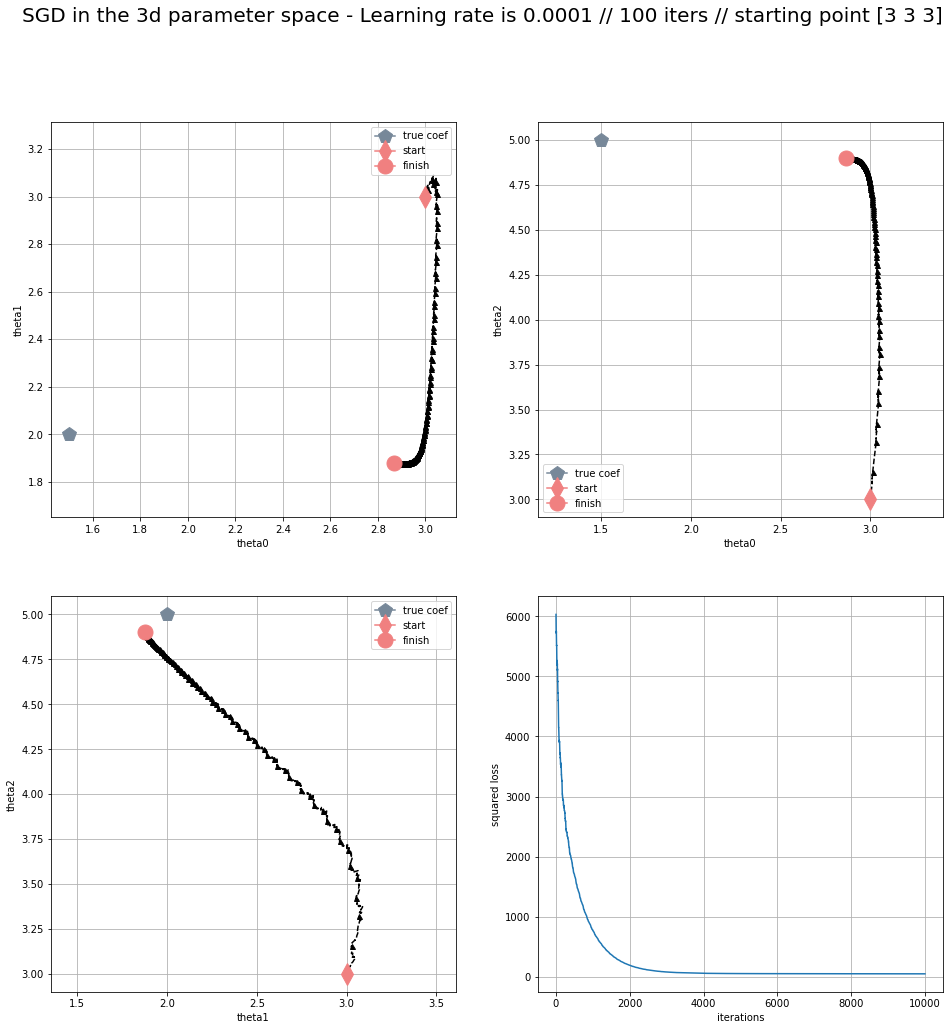

In [10]:
def stochastic_gradient_descent(learning_rate, num_iter, theta_initial):

    ## Initialization steps
    theta = theta_initial
    # below are different in STOCHASTIC gradient descent
    theta_path = np.zeros(((num_iter*num_obs)+1,3))
    theta_path[0,:] = theta_initial
    loss_vec = np.zeros(num_iter*num_obs)

    ## Main SGD loop
    count = 0
    for i in range(num_iter):
        for j in range(num_obs):
            count+=1
            y_pred = np.dot(theta.T,x_mat.T)
            loss_vec[count-1] = np.sum((y-y_pred)**2)
            grad_vec = (y[j]-y_pred[j])*(x_mat[j,:])
            theta = theta + learning_rate*grad_vec
            theta_path[count,:]=theta
    return theta_path, loss_vec

## Parameters to change
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3, 3, 3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, 
         num_iter, theta_initial, 'SGD')

Play with the parameters below and observe the trajectory it results in

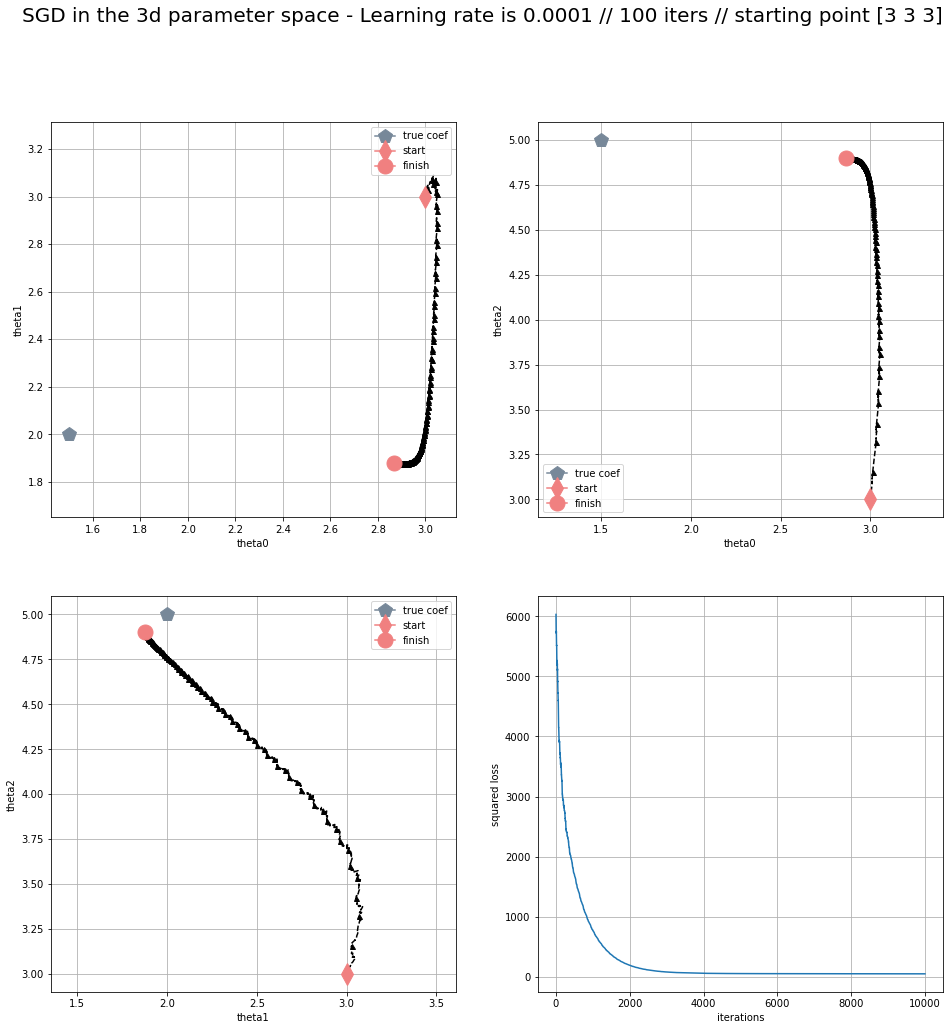

In [11]:
## Parameters to play with
learning_rate = 1e-4
num_iter = 100
theta_initial = np.array([3,3,3])


theta_path, loss_vec = stochastic_gradient_descent(learning_rate, 
                                                   num_iter, 
                                                   theta_initial)
plot_all(theta_path, loss_vec, learning_rate, num_iter, 
         theta_initial, 'SGD')